## Book Recommendation System 📚

### Introduction 🚀

Welcome to our cutting-edge project, aimed at revolutionizing the world of book recommendations through advanced data analysis and machine learning. In a digital era inundated with a vast array of reading options, finding the perfect book can be both exciting and overwhelming. Our project addresses this challenge by leveraging data-driven insights to provide tailored book recommendations, enhancing the reading experience for every individual.

### Project Objective 🎯

Our primary goal is to design a robust book recommendation system that caters to diverse tastes and preferences. We employ two fundamental recommendation strategies: Popularity-Based and Collaborative Filtering. Through meticulous data handling, exploration, and algorithmic approaches, we aspire to offer users a curated selection of books that align with their unique interests.

### Why Book Recommendations Matter 📖

Book recommendations play a pivotal role in connecting readers with books that resonate with them. A well-crafted recommendation can introduce readers to genres, authors, and narratives they might have never discovered otherwise. By combining data analytics and machine learning, we aim to streamline this discovery process, fostering a deeper appreciation for literature and encouraging a love for reading.

### The Journey Ahead 🗺️

Our journey begins with data handling and exploration, where we will familiarize ourselves with the dataset and prepare it for analysis. Subsequently, we will delve into the implementation of Popularity-Based Recommender System, illuminating popular trends in the literary world. Following that, we will venture into Collaborative Filtering, fine-tuning recommendations based on user behavior and preferences. In the end, we will merge these approaches to create a holistic recommendation system, enriching the book discovery experience for all bibliophiles.

Let's embark on this exhilarating literary voyage and unravel the magic of intelligent book recommendations! 🌟

## Importing Libraries

In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot  as plt 
%matplotlib inline 
import missingno as msno

import warnings 
warnings.filterwarnings("ignore")

1. `pandas`:
   - Data manipulation and analysis.
   - Provides DataFrames and Series for structured data.

2. `numpy`:
   - Numerical computations in Python.
   - Supports arrays and mathematical functions.

3. `seaborn`:
   - Data visualization library.
   - Simplifies creating attractive statistical plots.

4. `matplotlib.pyplot` (as `plt`):
   - Library for creating visualizations.
   - Used for various plot types in Python.

5. `%matplotlib inline`:
   - Jupyter notebook magic command.
   - Displays Matplotlib plots in the notebook.

6. `missingno` (as `msno`):
   - Visualizes missing data in datasets.
   - Helps identify missing value patterns.

7. `warnings`:
   - Controls warning messages in code.
   - Used to filter and ignore warnings.

## Loading and Updating Datasets

In [2]:
# Load your dataset containing book information
# Replace 'books.csv' with the actual file name 
books = pd.read_csv('books.csv')

# Define a dictionary to map book titles to their corresponding image file paths
book_images = {
    "The Hitchhiker's Guide to the Galaxy": "The Hitchhiker's Guide to the Galaxy.jpg",
    "Outlander": "Outlander.jpg",
    "The Color Purple": "The Color Purple.jpg",
    "Misery": "Misery.jpg",
    "Watership Down": "Watership Down.jpg",
    "One for the Money (Stephanie Plum Novels (Paperback))": "One for the Money (Stephanie Plum Novels (Paperback)).jpg",
    "Insomnia": "Insomnia.jpg"
}

# Update the 'Image-URL-M' column with the local file paths
for book_title, image_path in book_images.items():
    books.loc[books['Book-Title'] == book_title, 'Image-URL-L'] = image_path

# Save the updated dataset to a new CSV file
books.to_csv('updated_books.csv', index=False)


This code aims to improve the dataset's image handling by correcting image file paths,   
ensuring that images associated with book titles are displayed correctly in further analysis or visualization tasks.

In [3]:
# Loading dataset

books = pd.read_csv('updated_books.csv')
users = pd.read_csv('users.csv')
ratings = pd.read_csv('ratings.csv')

## Overview of the Data:

In [4]:
# Display Top 5 Rows of The books

books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


- `ISBN`: The International Standard Book Number, a unique identifier for books.
- `Book-Title`: The title of the book.
- `Book-Author`: The author(s) of the book.
- `Year-Of-Publication`: The year when the book was published.
- `Publisher`: The publisher of the book.
- `Image-URL-S`, `Image-URL-M`, `Image-URL-L`: URLs pointing to small, medium, and large images of the book cover.

In [5]:
# Display Top 5 Rows of The users

users.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [6]:
# Split the 'Location' column into separate columns
location_split = users['Location'].str.split(', ', n=2, expand=True)

# Create new columns 'City', 'State/Territory', and 'Country' based on the split
users['City'] = location_split[0]
users['State/Territory'] = location_split[1]
users['Country'] = location_split[2]

# Now, your DataFrame 'users' has the new columns 'City,' 'State/Territory,' and 'Country.'

In [7]:
# Display Top 5 Rows of The ratings

ratings.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [8]:
# Find Shape of Our books using bar graph.

print("Books Dataset: ")
print(" Number of Rows:", books.shape[0])
print(" Number of Columns:", books.shape[1])
print()

print("Users Datset: ")
print(" Number of Rows:", users.shape[0])
print(" Number of Columns:", users.shape[1])
print()

print("Ratings Dataset: ")
print(" Number of Rows:", ratings.shape[0])
print(" Number of Columns:", ratings.shape[1])
print()


Books Dataset: 
 Number of Rows: 271360
 Number of Columns: 8

Users Datset: 
 Number of Rows: 278858
 Number of Columns: 6

Ratings Dataset: 
 Number of Rows: 1149780
 Number of Columns: 3



These shapes provide information about the size and structure of each dataset,  
which is useful for understanding the data we're working with and for performing data analysis and manipulations.

## Data Information

In [9]:
# Information about the users
books.info()
print()
print()
print()

users.info()
print()
print()
print()

ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271359 non-null  object
 3   Year-Of-Publication  271360 non-null  object
 4   Publisher            271358 non-null  object
 5   Image-URL-S          271360 non-null  object
 6   Image-URL-M          271360 non-null  object
 7   Image-URL-L          271357 non-null  object
dtypes: object(8)
memory usage: 16.6+ MB



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   User-ID          278858 non-null  int64  
 1   Location         278858 non-null  object 
 2   Age              168096 non-null  float64
 

- 'Books' dataset has 271,360 rows and 8 columns with mainly object data types, using approximately 16.6 MB memory.
- 'Users' dataset has 278,858 rows and 6 columns with mixed data types, using approximately 12.8 MB memory, with some 'Age' missing values.
- 'Ratings' dataset has 1,149,780 rows and 3 columns with integer and object data types, using approximately 26.3 MB memory.

## Checking Null Values

ISBN                   0
Book-Title             0
Book-Author            1
Year-Of-Publication    0
Publisher              2
Image-URL-S            0
Image-URL-M            0
Image-URL-L            3
dtype: int64


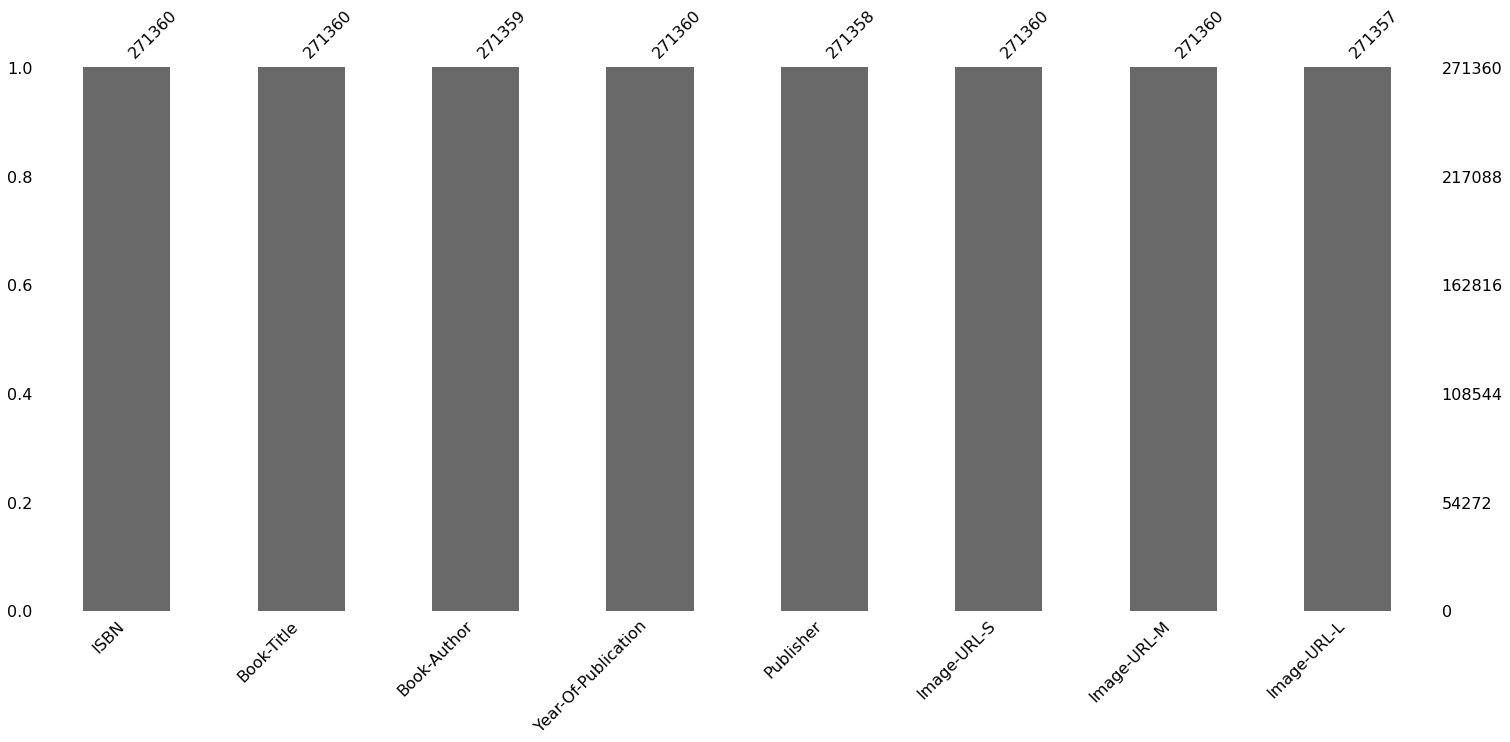

User-ID                 0
Location                0
Age                110762
City                    0
State/Territory         1
Country              4577
dtype: int64


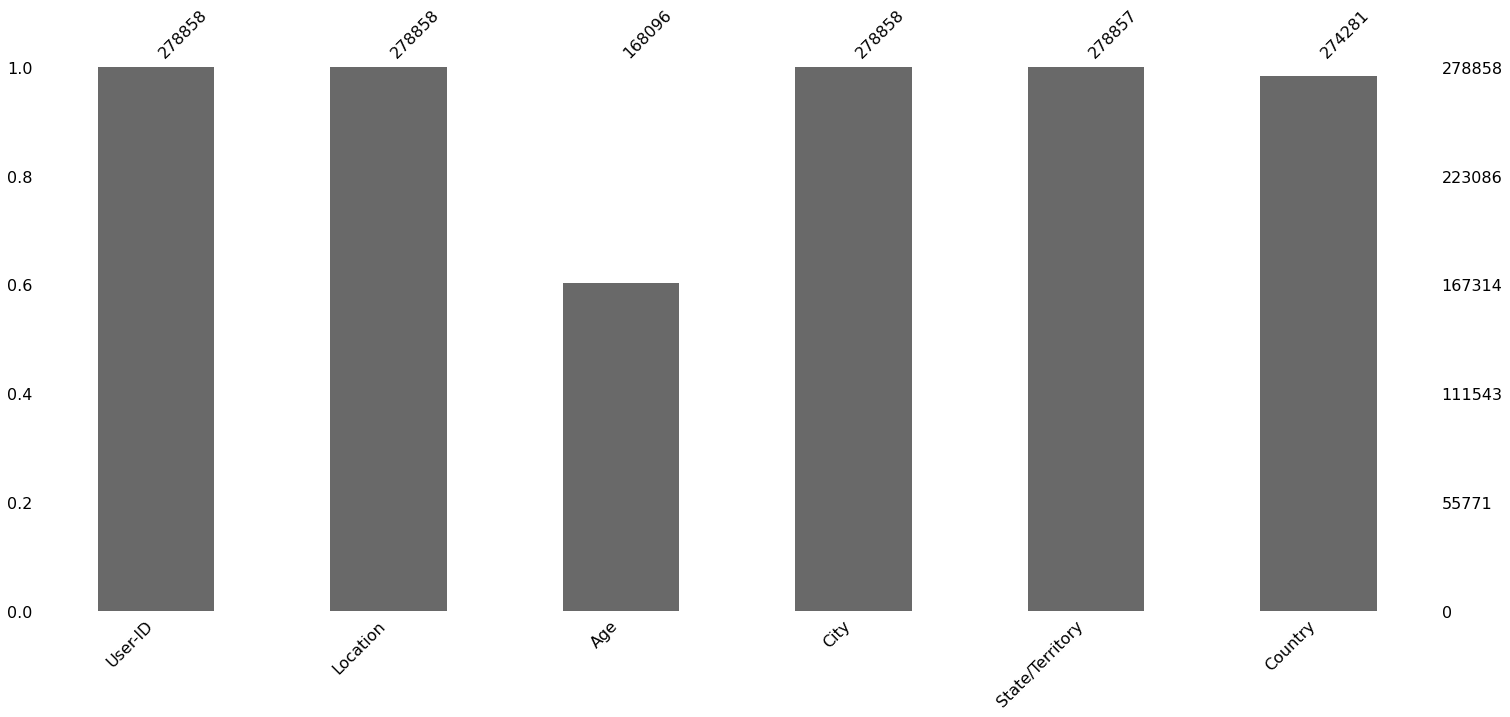

User-ID        0
ISBN           0
Book-Rating    0
dtype: int64


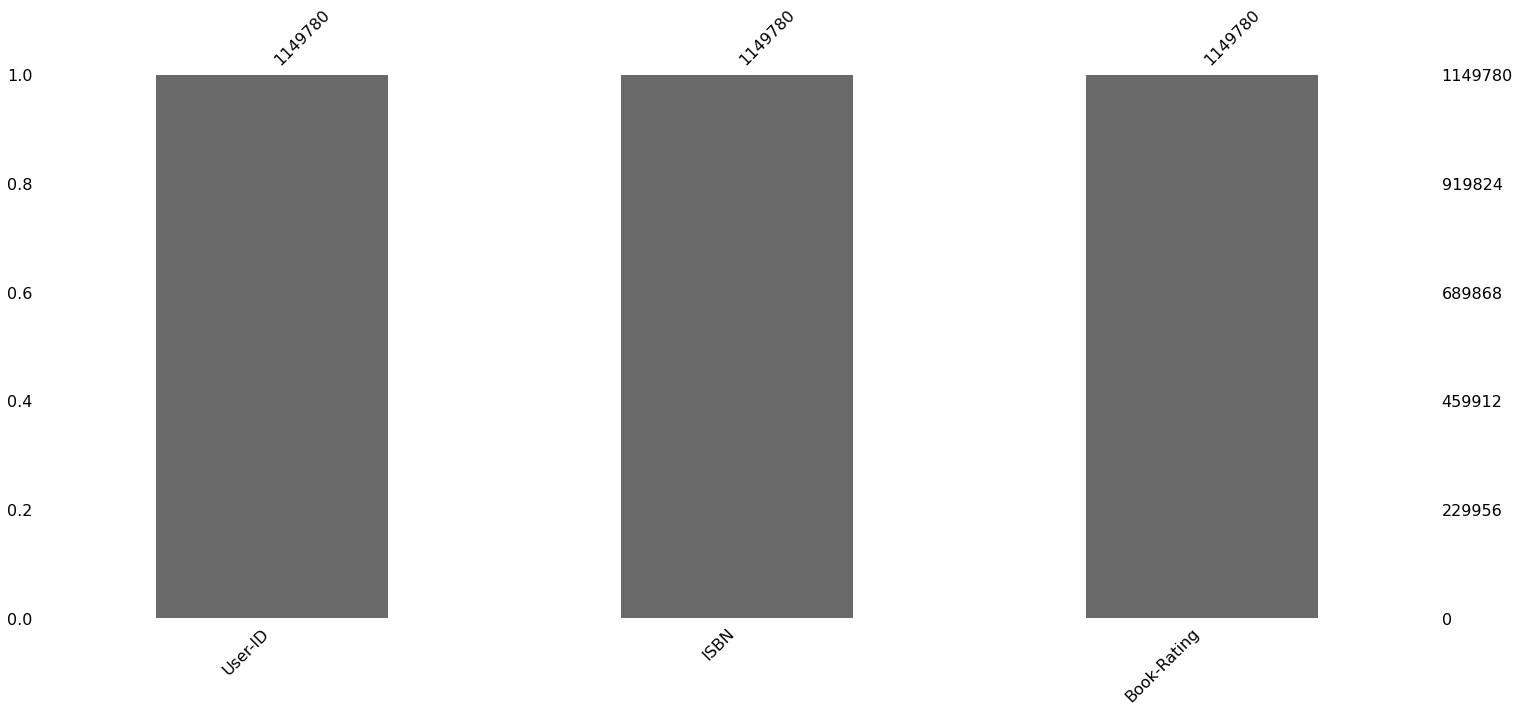

In [10]:
print(books.isnull().sum())
msno.bar(books)
plt.show()

print(users.isnull().sum())
msno.bar(users)
plt.show()

print(ratings.isnull().sum())
msno.bar(ratings)
plt.show()

- In the 'Books' dataset, 'Book-Author' has 1 null value, 'Publisher' has 2 null values, and 'Image-URL-L' has 3 null values.
- In the 'Users' dataset, 'Age' has 110,762 null values, 'State/Territory' has 1 null value, and 'Country' has 4,577 null values.
- The 'Ratings' dataset does not contain any null values.

## Checking Duplicate Values

In [11]:
print(books.duplicated().sum())
print()

print(users.duplicated().sum())
print()

print(ratings.duplicated().sum())

0

0

0


No duplicate rows were found in the "books," "users," and "ratings".

## Summary Statistics:

In [12]:
# Summary statistics for numerical columns
print("Summary Statistics for Ratings:")
print(ratings['Book-Rating'].describe())

Summary Statistics for Ratings:
count    1.149780e+06
mean     2.866950e+00
std      3.854184e+00
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      7.000000e+00
max      1.000000e+01
Name: Book-Rating, dtype: float64


## Handling Missing Values

In [13]:
# Handle missing values in books dataset
books['Book-Author'].fillna('Unknown', inplace=True)
books['Publisher'].fillna('Unknown', inplace=True)

# Handle missing values in users dataset
users['Age'].fillna(users['Age'].mean(), inplace=True)

In [14]:
# Convert 'Year-Of-Publication' and 'Age' columns to appropriate data types
books['Year-Of-Publication'] = pd.to_numeric(books['Year-Of-Publication'], errors='coerce')
users['Age'] = users['Age'].astype(int)

- 'Books' dataset missing values in 'Book-Author' and 'Publisher' filled with 'Unknown,' and 'Year-Of-Publication' converted to numeric.
- 'Users' dataset missing values in 'Age' filled with mean age and 'Age' column converted to integer data type.

## Visualization

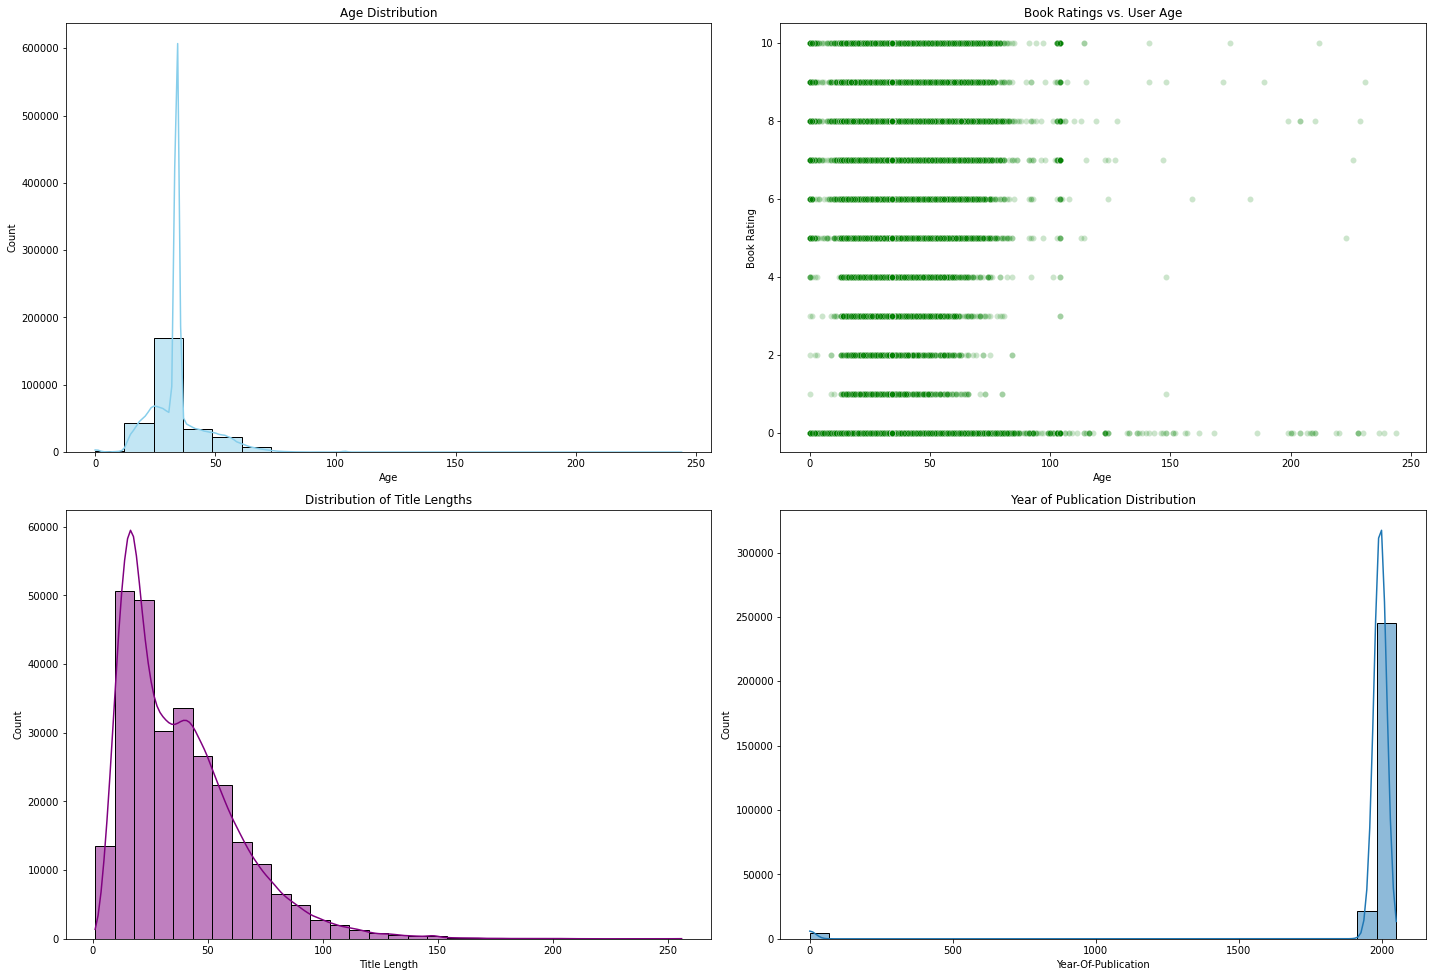

In [15]:
# Create a new figure for the plots
plt.figure(figsize=(20, 20))

# Age Distribution
plt.subplot(3, 2, 1)
sns.histplot(users['Age'], bins=20, kde=True, color='skyblue')
plt.title('Age Distribution')

# Book Ratings vs. User Age
plt.subplot(3, 2, 2)
sns.scatterplot(x=users['Age'], y=ratings['Book-Rating'], alpha=0.2, color='green')
plt.title('Book Ratings vs. User Age')
plt.xlabel('Age')
plt.ylabel('Book Rating')

# Distribution of Book Titles' Lengths
plt.subplot(3, 2, 3)
books['Title-Length'] = books['Book-Title'].apply(len)
sns.histplot(data=books, x='Title-Length', bins=30, kde=True, color='purple')
plt.title('Distribution of Title Lengths')
plt.xlabel('Title Length')

# Year of Publication Distribution
plt.subplot(3, 2, 4)
sns.histplot(books['Year-Of-Publication'], bins=30, kde=True, palette="YlOrBr")
plt.title('Year of Publication Distribution')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

**Age Distribution**

The **Book Ratings vs. User Age** graph shows the number of book ratings by user age.   
This scatter plot shows a positive correlation between user age and book ratings.    
The graph shows that the most common user age is between 25 and 50 years old.    
The graph also shows that there is a significant decrease in the number of book ratings from users over 50 years old.

**Year of Publication Distribution**

The **Year of Publication Distribution** graph shows the number of books published by year of publication.    
The graph shows that there has been a significant increase in the number of books published over time.    
The graph also shows that the most common year of publication is in the last 20 years.

**Title Length Distribution**

The **Distribution of Title Lengths** graph shows the number of books published by title length.    
The graph shows that the most common title length is between 1 and 50 characters long.    
The graph also shows that there is a significant decrease in the number of books published with titles that are longer than 50 characters.

## Country and State/Territory Analysis

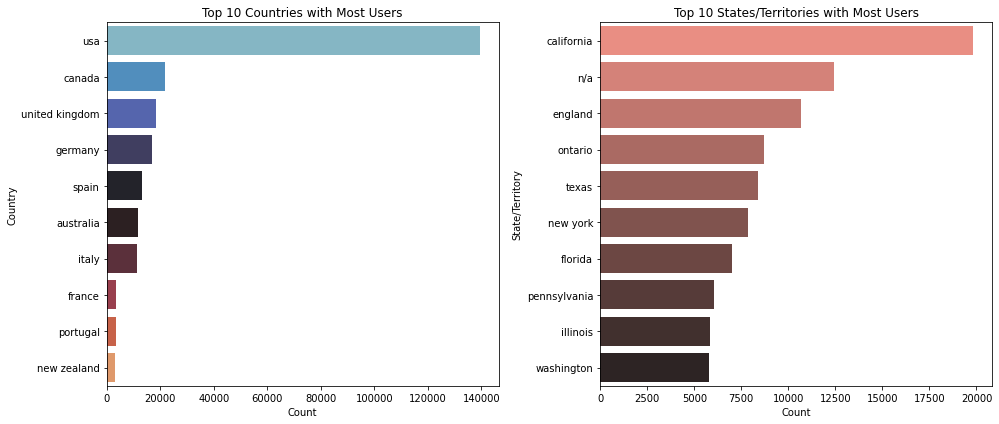

In [16]:
plt.figure(figsize=(14, 6))

# Country Analysis
plt.subplot(1, 2, 1)
sns.countplot(data=users, y='Country', order=users['Country'].value_counts().index[:10], palette="icefire")
plt.title('Top 10 Countries with Most Users')
plt.xlabel('Count')


# State/Territory Analysis (if applicable)
plt.subplot(1, 2, 2)
sns.countplot(data=users, y='State/Territory', order=users['State/Territory'].value_counts().index[:10], palette='dark:salmon_r')
plt.title('Top 10 States/Territories with Most Users')
plt.xlabel('Count')

plt.tight_layout()
plt.show()

The `top 10 countries` with most users overall.    
The United States is the clear leader with over 120,000 users, followed by Canada, the United Kingdom, Germany, and Spain.

The `top 10 states/territories` with most users in the United States.    
California is the most popular state with over 20,000 users, followed by New York, Florida, Pennsylvania, and Texas.

## Top Authors and Publishers

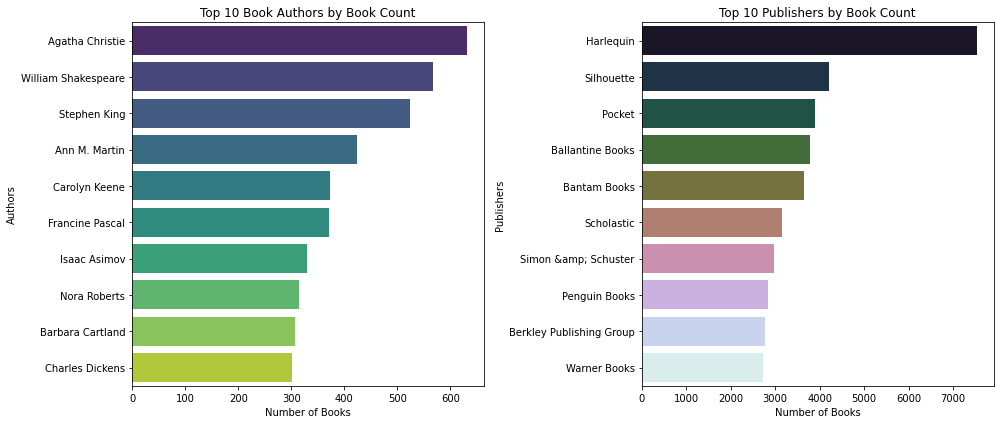

In [17]:
# Top 10 book authors by book count
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
top_authors = books['Book-Author'].value_counts().head(10)
sns.barplot(x=top_authors.values, y=top_authors.index, palette="viridis")
plt.title('Top 10 Book Authors by Book Count')
plt.xlabel('Number of Books')
plt.ylabel('Authors')

# Top 10 book publishers by book count
plt.subplot(1, 2, 2)
top_publishers = books['Publisher'].value_counts().head(10)
sns.barplot(x=top_publishers.values, y=top_publishers.index, palette="cubehelix")
plt.title('Top 10 Publishers by Book Count')
plt.xlabel('Number of Books')
plt.ylabel('Publishers')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

The `top 10 authors` by book count have all published over 100 books.   
Agatha Christie, the most prolific author on the list, has published over 600 books. 

The `top 10 publishers` by book count have all published over 1,000 books.   
Harlequin, the most prolific publisher on the list, has published over 7,000 books.

It is interesting to note that the `top 10 authors` are all dominated by fiction writers. The `top 10 publishers` are also dominated by fiction publishers.   
This suggests that fiction is the most popular genre of book.

# Popularity Based Recommender System

In [18]:
# Merge ratings and books dataframes on the 'ISBN' column
ratings_with_name = pd.merge(ratings,books, left_on='ISBN', right_on='ISBN',how='inner')

In [19]:
# Replace HTTP with HTTPS in Image-URL-S, Image-URL-M, and Image-URL-L columns
ratings_with_name[['Image-URL-S', 'Image-URL-M', 'Image-URL-L']] = ratings_with_name[['Image-URL-S', 'Image-URL-M', 'Image-URL-L']].replace('^http:', 'https:', regex=True)

In [20]:
# Group by 'Book-Title' and count the number of ratings for each book
num_rating_df = ratings_with_name.groupby('Book-Title').count()['Book-Rating'].reset_index()

# Rename the column to 'num_ratings' for clarity
num_rating_df.rename(columns={'Book-Rating': 'num_ratings'}, inplace=True)

# Display the DataFrame showing the number of ratings for each book
num_rating_df

,Book-Title,num_ratings
0,A Light in the Storm: The Civil War Diary of ...,4
1,Always Have Popsicles,1
2,Apple Magic (The Collector's series),1
3,"Ask Lily (Young Women of Faith: Lily Series, ...",1
4,Beyond IBM: Leadership Marketing and Finance ...,1
...,...,...
241066,Ã?Â?lpiraten.,2
241067,Ã?Â?rger mit Produkt X. Roman.,4
241068,Ã?Â?sterlich leben.,1
241069,Ã?Â?stlich der Berge.,3


In [21]:
# Group by 'Book-Title' and calculate the mean (average) rating for each book
avg_rating_df = ratings_with_name.groupby('Book-Title').mean()['Book-Rating'].reset_index()

# Rename the column to 'avg_rating' for clarity
avg_rating_df.rename(columns={'Book-Rating': 'avg_rating'}, inplace=True)

# Display the DataFrame showing the average rating for each book
avg_rating_df

,Book-Title,avg_rating
0,A Light in the Storm: The Civil War Diary of ...,2.250000
1,Always Have Popsicles,0.000000
2,Apple Magic (The Collector's series),0.000000
3,"Ask Lily (Young Women of Faith: Lily Series, ...",8.000000
4,Beyond IBM: Leadership Marketing and Finance ...,0.000000
...,...,...
241066,Ã?Â?lpiraten.,0.000000
241067,Ã?Â?rger mit Produkt X. Roman.,5.250000
241068,Ã?Â?sterlich leben.,7.000000
241069,Ã?Â?stlich der Berge.,2.666667


In [22]:
# Merge the dataframes containing the number of ratings and average ratings on the 'Book-Title' column
popular_df = pd.merge(num_rating_df, avg_rating_df, left_on='Book-Title', right_on='Book-Title',how='inner')
popular_df

,Book-Title,num_ratings,avg_rating
0,A Light in the Storm: The Civil War Diary of ...,4,2.250000
1,Always Have Popsicles,1,0.000000
2,Apple Magic (The Collector's series),1,0.000000
3,"Ask Lily (Young Women of Faith: Lily Series, ...",1,8.000000
4,Beyond IBM: Leadership Marketing and Finance ...,1,0.000000
...,...,...,...
241066,Ã?Â?lpiraten.,2,0.000000
241067,Ã?Â?rger mit Produkt X. Roman.,4,5.250000
241068,Ã?Â?sterlich leben.,1,7.000000
241069,Ã?Â?stlich der Berge.,3,2.666667


In [23]:
# Filter out books with fewer than 250 ratings
popular_df = popular_df[popular_df['num_ratings']>=250]
popular_df

,Book-Title,num_ratings,avg_rating
764,1984,284,4.454225
818,1st to Die: A Novel,509,3.575639
1048,2nd Chance,356,3.269663
1760,A Bend in the Road,346,3.364162
2281,"A Child Called \It\"": One Child's Courage to S...",265,4.086792
...,...,...,...
233850,White Oleander : A Novel,387,3.506460
233851,White Oleander : A Novel (Oprah's Book Club),356,3.772472
234740,Wicked: The Life and Times of the Wicked Witch...,326,3.766871
234951,Wild Animus,2502,1.019584


In [24]:
# Sort the dataframe by average rating in descending order and select the top 100 books
popular_df = popular_df[popular_df['num_ratings']>=250].sort_values('avg_rating', ascending = False).head(100)
popular_df

,Book-Title,num_ratings,avg_rating
80434,Harry Potter and the Prisoner of Azkaban (Book 3),428,5.852804
80422,Harry Potter and the Goblet of Fire (Book 4),387,5.824289
80441,Harry Potter and the Sorcerer's Stone (Book 1),278,5.737410
80426,Harry Potter and the Order of the Phoenix (Boo...,347,5.501441
80414,Harry Potter and the Chamber of Secrets (Book 2),556,5.183453
...,...,...,...
176827,The Beach House,435,3.347126
191926,The Hours: A Novel,294,3.346939
89780,Icy Sparks,309,3.346278
14351,Angela's Ashes (MMP) : A Memoir,326,3.337423


In [25]:
# Merge popular_df with the 'books' dataframe on 'Book-Title' to get additional book information
# Drop duplicates based on 'Book-Title' to keep unique book entries
# Select specific columns for the final popular books dataframe
popular_df = popular_df.merge(books, on='Book-Title').drop_duplicates('Book-Title')[['Book-Title','Book-Author','Image-URL-L','num_ratings','avg_rating']]
popular_df

,Book-Title,Book-Author,Image-URL-L,num_ratings,avg_rating
0,Harry Potter and the Prisoner of Azkaban (Book 3),J. K. Rowling,http://images.amazon.com/images/P/0439136350.0...,428,5.852804
3,Harry Potter and the Goblet of Fire (Book 4),J. K. Rowling,http://images.amazon.com/images/P/0439139597.0...,387,5.824289
5,Harry Potter and the Sorcerer's Stone (Book 1),J. K. Rowling,http://images.amazon.com/images/P/0590353403.0...,278,5.737410
9,Harry Potter and the Order of the Phoenix (Boo...,J. K. Rowling,http://images.amazon.com/images/P/043935806X.0...,347,5.501441
13,Harry Potter and the Chamber of Secrets (Book 2),J. K. Rowling,http://images.amazon.com/images/P/0439064872.0...,556,5.183453
...,...,...,...,...,...
338,The Beach House,James Patterson,http://images.amazon.com/images/P/0446612545.0...,435,3.347126
344,The Hours: A Novel,Michael Cunningham,http://images.amazon.com/images/P/0312305060.0...,294,3.346939
345,Icy Sparks,Gwyn Hyman Rubio,http://images.amazon.com/images/P/0142000205.0...,309,3.346278
347,Angela's Ashes (MMP) : A Memoir,Frank McCourt,http://images.amazon.com/images/P/0684872153.0...,326,3.337423


In [26]:
from IPython.display import Image, HTML

# Function to convert image URL to HTML image tag
def path_to_image_html(image_url):
    return  f'<img src="{image_url}" width="100"/>'

# Create a Series with integers from 1 to 100 as index
s = pd.Series(range(1,101)) 

# Select the top 100 popular books from 'popular_df' and filter the required columns
pop100 = popular_df.head(100)[['Book-Title', 'Book-Author', 'Image-URL-L', 'num_ratings', 'avg_rating']]

# Set the Series 's' as the index for the DataFrame 'pop100'
pop100 = pop100.set_index(s)

# Convert the 'Image-URL-M' column to HTML image tags using the 'path_to_image_html' function
pop100['Image-URL-L'] = pop100['Image-URL-L'].apply(path_to_image_html)

# Display the DataFrame 'pop100' as an HTML table with the image tags for book covers
HTML(pop100.to_html(escape=False))

,Book-Title,Book-Author,Image-URL-L,num_ratings,avg_rating
1,Harry Potter and the Prisoner of Azkaban (Book 3),J. K. Rowling,,428,5.852804
2,Harry Potter and the Goblet of Fire (Book 4),J. K. Rowling,,387,5.824289
3,Harry Potter and the Sorcerer's Stone (Book 1),J. K. Rowling,,278,5.737410
4,Harry Potter and the Order of the Phoenix (Book 5),J. K. Rowling,,347,5.501441
5,Harry Potter and the Chamber of Secrets (Book 2),J. K. Rowling,,556,5.183453
6,The Hobbit : The Enchanting Prelude to The Lord of the Rings,J.R.R. TOLKIEN,,281,5.007117
7,"The Fellowship of the Ring (The Lord of the Rings, Part 1)",J.R.R. TOLKIEN,,368,4.948370
8,Harry Potter and the Sorcerer's Stone (Harry Potter (Paperback)),J. K. Rowling,,575,4.895652
9,"The Two Towers (The Lord of the Rings, Part 2)",J.R.R. TOLKIEN,,260,4.880769
10,To Kill a Mockingbird,Harper Lee,,510,4.700000


# Collaborative Filtering Based Recommender System

In [27]:
# Filter users with more than 200 ratings
x = ratings_with_name.groupby('User-ID').count()['Book-Rating'] > 200
active_users = x[x].index

- Identifies active users who have rated more than 200 books and stores their User-IDs in a variable named `active_users`.

In [28]:
# Filter ratings for active users and famous books
filtered_ratings = ratings_with_name[ratings_with_name['User-ID'].isin(active_users)]
filtered_ratings

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,Title-Length
2,6543,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002.0,Ballantine Books,https://images.amazon.com/images/P/034545104X....,https://images.amazon.com/images/P/034545104X....,https://images.amazon.com/images/P/034545104X....,20
5,23768,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002.0,Ballantine Books,https://images.amazon.com/images/P/034545104X....,https://images.amazon.com/images/P/034545104X....,https://images.amazon.com/images/P/034545104X....,20
7,28523,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002.0,Ballantine Books,https://images.amazon.com/images/P/034545104X....,https://images.amazon.com/images/P/034545104X....,https://images.amazon.com/images/P/034545104X....,20
15,77940,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002.0,Ballantine Books,https://images.amazon.com/images/P/034545104X....,https://images.amazon.com/images/P/034545104X....,https://images.amazon.com/images/P/034545104X....,20
16,81977,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002.0,Ballantine Books,https://images.amazon.com/images/P/034545104X....,https://images.amazon.com/images/P/034545104X....,https://images.amazon.com/images/P/034545104X....,20
...,...,...,...,...,...,...,...,...,...,...,...
1030883,275970,1880837927,0,The Theology of the Hammer,Millard Fuller,1994.0,Smyth &amp; Helwys Publishing,https://images.amazon.com/images/P/1880837927....,https://images.amazon.com/images/P/1880837927....,https://images.amazon.com/images/P/1880837927....,26
1030884,275970,188717897X,0,The Ordeal of Integration: Progress and Resent...,Orlando Patterson,1998.0,Civitas Book Publisher,https://images.amazon.com/images/P/188717897X....,https://images.amazon.com/images/P/188717897X....,https://images.amazon.com/images/P/188717897X....,105
1030885,275970,1888889047,0,Pushcart's Complete Rotten Reviews &amp; Rejec...,Bill Henderson,1998.0,Pushcart Press,https://images.amazon.com/images/P/1888889047....,https://images.amazon.com/images/P/1888889047....,https://images.amazon.com/images/P/1888889047....,51
1030886,275970,1931868123,0,There's a Porcupine in My Outhouse: Misadventu...,Mike Tougias,2002.0,Capital Books (VA),https://images.amazon.com/images/P/1931868123....,https://images.amazon.com/images/P/1931868123....,https://images.amazon.com/images/P/1931868123....,102


In [29]:
y = filtered_ratings.groupby('Book-Title').count()['Book-Rating']>=50
popular_books = y[y].index

In [30]:
final_ratings = filtered_ratings[filtered_ratings['Book-Title'].isin(popular_books)]
final_ratings

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,Title-Length
63,278418,0446520802,0,The Notebook,Nicholas Sparks,1996.0,Warner Books,https://images.amazon.com/images/P/0446520802....,https://images.amazon.com/images/P/0446520802....,https://images.amazon.com/images/P/0446520802....,12
65,3363,0446520802,0,The Notebook,Nicholas Sparks,1996.0,Warner Books,https://images.amazon.com/images/P/0446520802....,https://images.amazon.com/images/P/0446520802....,https://images.amazon.com/images/P/0446520802....,12
66,7158,0446520802,10,The Notebook,Nicholas Sparks,1996.0,Warner Books,https://images.amazon.com/images/P/0446520802....,https://images.amazon.com/images/P/0446520802....,https://images.amazon.com/images/P/0446520802....,12
69,11676,0446520802,10,The Notebook,Nicholas Sparks,1996.0,Warner Books,https://images.amazon.com/images/P/0446520802....,https://images.amazon.com/images/P/0446520802....,https://images.amazon.com/images/P/0446520802....,12
74,23768,0446520802,6,The Notebook,Nicholas Sparks,1996.0,Warner Books,https://images.amazon.com/images/P/0446520802....,https://images.amazon.com/images/P/0446520802....,https://images.amazon.com/images/P/0446520802....,12
...,...,...,...,...,...,...,...,...,...,...,...
1026724,266865,0531001725,10,The Catcher in the Rye,Jerome David Salinger,1973.0,Scholastic Library Pub,https://images.amazon.com/images/P/0531001725....,https://images.amazon.com/images/P/0531001725....,https://images.amazon.com/images/P/0531001725....,22
1027923,269566,0670809381,0,Echoes,Maeve Binchy,1986.0,Penguin USA,https://images.amazon.com/images/P/0670809381....,https://images.amazon.com/images/P/0670809381....,https://images.amazon.com/images/P/0670809381....,6
1028777,271284,0440910927,0,The Rainmaker,John Grisham,1995.0,Island,https://images.amazon.com/images/P/0440910927....,https://images.amazon.com/images/P/0440910927....,https://images.amazon.com/images/P/0440910927....,13
1029070,271705,B0001PIOX4,0,Fahrenheit 451,Ray Bradbury,1993.0,Simon &amp; Schuster,https://images.amazon.com/images/P/B0001PIOX4....,https://images.amazon.com/images/P/B0001PIOX4....,https://images.amazon.com/images/P/B0001PIOX4....,14


- Filters the ratings for active users and books that have been rated by at least 50 users, storing the results in a DataFrame named `final_ratings`.

In [31]:
# Create a pivot table for collaborative filtering
pivot_table = final_ratings.pivot_table(index='Book-Title', columns='User-ID', values='Book-Rating')
pivot_table.fillna(0, inplace=True)
pivot_table

User-ID,254,2276,2766,2977,3363,4017,4385,6251,6323,6543,...,271705,273979,274004,274061,274301,274308,275970,277427,277639,278418
Book-Title,,,,,,,,,,,,,,,,,,,,,
1984,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1st to Die: A Novel,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2nd Chance,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4 Blondes,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A Bend in the Road,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Year of Wonders,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
You Belong To Me,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Zen and the Art of Motorcycle Maintenance: An Inquiry into Values,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


- Creates a pivot table (`pivot_table`) for collaborative filtering, where rows represent book titles, columns represent User-IDs, and values represent book ratings given by users.

In [32]:
from sklearn.metrics.pairwise import cosine_similarity

In [33]:
# Compute similarity scores using cosine similarity
similarity_scores = cosine_similarity(pivot_table)
similarity_scores.shape

(706, 706)

- Cosine similarity scores are computed for a pivot table representing book ratings given by users, resulting in a similarity matrix of shape `(706, 706)`.

In [34]:
# Define a function to recommend similar books
def recommend(book_title):
    book_index = np.where(pivot_table.index == book_title)[0][0]
    similar_books = list(enumerate(similarity_scores[book_index]))
    similar_books = sorted(similar_books, key=lambda x: x[1], reverse=True)
    similar_books = similar_books[1:6]

    recommendations = []
    for i in similar_books:
        similar_book_title = pivot_table.index[i[0]]
        similar_book_author = books.loc[books['Book-Title'] == similar_book_title, 'Book-Author'].values[0]
        similar_book_image = books.loc[books['Book-Title'] == similar_book_title, 'Image-URL-L'].values[0]
        
        recommendations.append({
            'Book-Title': similar_book_title,
            'Book-Author': similar_book_author,
            'Image-URL-L': similar_book_image
        })
    
    return recommendations

- A function named `recommend` is defined to recommend similar books based on a given book title.
- The function calculates similarity scores for the given book against all other books, sorts them in descending order, and selects the top 5 most similar books.
- For each similar book, the title, author, and image URL are retrieved from the data and stored in a recommendations list.

In [35]:
# Assuming you have the required dataframes and variables
book_name = '1984'
recommended_books = recommend(book_name)

   - Given a book title (e.g., '1984'), the `recommend` function is called to generate recommended books similar to the given book.
   - The recommendations are stored in a DataFrame named `recommended_df`.

In [36]:
# Create a DataFrame with the recommended books
recommended_df = pd.DataFrame(recommended_books)

# Convert the 'Image-URL-M' column to HTML image tags using the 'path_to_image_html' function
recommended_df['Image-URL-L'] = recommended_df['Image-URL-L'].apply(lambda x: f'<img src="{x}" width="100"/>')

In [37]:
# Display the recommended books as an HTML table with the image tags for book covers
HTML(recommended_df.to_html(escape=False))

,Book-Title,Book-Author,Image-URL-L
0,Animal Farm,George Orwell,
1,The Handmaid's Tale,Margaret Atwood,
2,Brave New World,Aldous Huxley,
3,"The Vampire Lestat (Vampire Chronicles, Book II)",ANNE RICE,
4,The Hours : A Novel,Michael Cunningham,


- The 'Image-URL-L' column in `recommended_df` is converted to HTML image tags.
- The DataFrame `recommended_df` is displayed as an HTML table with book covers as image tags.

## Conclusion 🌠

In this project, we've **crafted** an **innovative book recommendation system** integrating both **Popularity-Based** and **Collaborative Filtering** approaches. Our **meticulous data analysis** and **visualization** provided deep insights into **user demographics**, **popular books**, and key **contributors** in the **literary world**. The **Popularity-Based system** showcased the **top 100 books**, unveiling **trends** in **reader preferences**. On the other hand, the **Collaborative Filtering system** **personalized recommendations** based on **user behavior**. By **blending data-driven strategies**, we aim to **enrich the reading journey** for **users**, guiding them to their **next literary adventure** with **precision** and **delight**. 📖🌟